# Question 1

In [17]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [18]:
csv_data = pd.read_csv("C:/Users/aakash011/Documents/train.csv", header=0)
csv_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
numeric_data = pd.DataFrame(csv_data[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
numeric_data.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


53      50271
66      19900
113     21000
120     21453
159     19378
        ...  
1396    57200
1409    20544
1423    19690
1430    21930
1446    26142
Name: LotArea, Length: 69, dtype: int64
58      2945
118     3222
185     3608
197     3112
231     2794
304     3493
324     2978
496     3228
523     4676
583     2775
608     3194
635     3395
691     4316
769     3279
798     3140
803     2822
961     2872
1024    2898
1031    3082
1046    2868
1142    2828
1169    3627
1173    3086
1175    2872
1182    4476
1268    3447
1298    5642
1312    2810
1328    2792
1353    3238
1386    2784
Name: GrLivArea, dtype: int64
17         0
39         0
70      2223
90         0
102        0
        ... 
1250    2110
1298    6110
1321       0
1373    2633
1412       0
Name: TotalBsmtSF, Length: 61, dtype: int64
178     1166
224      968
270     1053
317     1025
408      947
581     1390
664     1134
718      983
803     1020
825     1220
1061    1248
1087    1043
1142    1052
1184     995
1190

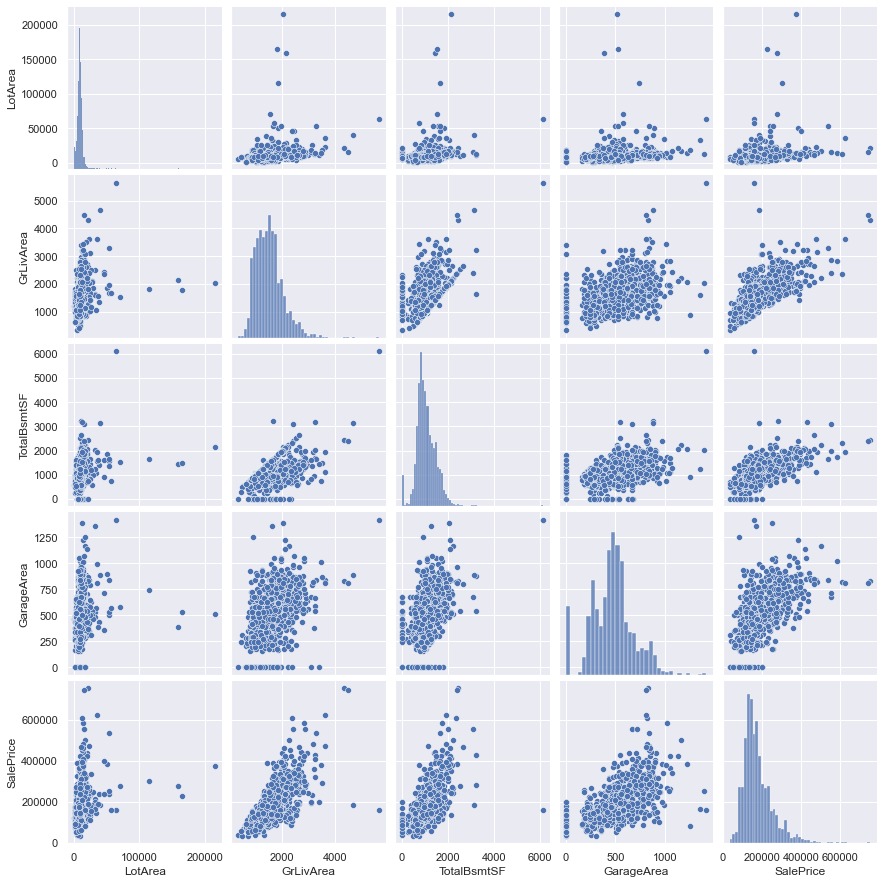

In [20]:
#a1)LotArea has the most outliers per box plot
#a2)Number of outliers = 69 after finding out the Q3 + 1.5*IQR and Q1 -1.5*IQR
#b)LotArea, skewed positively

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

for var in numeric_data:
    outliers = find_outliers_IQR(numeric_data[var])
    print(outliers)

sb.pairplot(data = numeric_data)

In [21]:
df_corr = numeric_data.corr()
print(df_corr)
#GrLivArea and GarageArea have the most correlation with SalePrice 

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


# Question 2

       0        1       2     3
0     60  CollgCr    1Fam     7
1     20  Veenker  2fmCon     6
2     70  Crawfor  Duplex     8
3     50  NoRidge  TwnhsE     5
4    190  Mitchel   Twnhs     9
5     45  Somerst    None     4
6     90   NWAmes    None    10
7    120  OldTown    None     3
8     30  BrkSide    None     1
9     85   Sawyer    None     2
10    80  NridgHt    None  None
11   160    NAmes    None  None
12    75  SawyerW    None  None
13   180   IDOTRR    None  None
14    40  MeadowV    None  None
15  None  Edwards    None  None
16  None   Timber    None  None
17  None  Gilbert    None  None
18  None  StoneBr    None  None
19  None  ClearCr    None  None
20  None  NPkVill    None  None
21  None  Blmngtn    None  None
22  None   BrDale    None  None
23  None    SWISU    None  None
24  None  Blueste    None  None


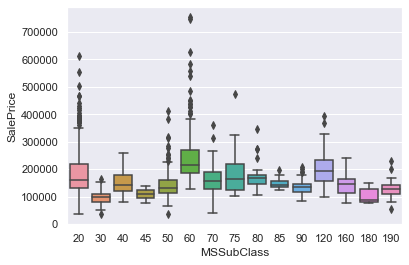

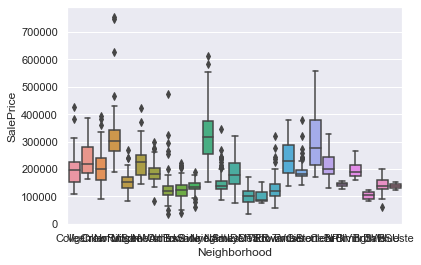

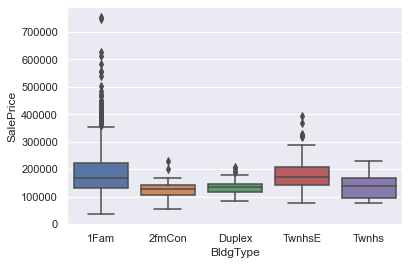

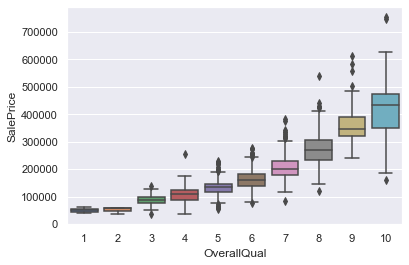

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [22]:
L = [csv_data['MSSubClass'].unique(),csv_data['Neighborhood'].unique(),csv_data['BldgType'].unique(),csv_data['OverallQual'].unique()]
df_levels = pd.DataFrame(L)
df_levelsT = df_levels.T

print(df_levelsT)
df_levelsT.describe()

p = [csv_data['MSSubClass'],csv_data['Neighborhood'],csv_data['BldgType'],csv_data['OverallQual'],csv_data['SalePrice']]
df_boxplot = pd.DataFrame(p).T

sb.boxplot(x='MSSubClass',y='SalePrice',data=df_boxplot)
plt.show()
sb.boxplot(x='Neighborhood',y='SalePrice',data=df_boxplot)
plt.show()
sb.boxplot(x='BldgType',y='SalePrice',data=df_boxplot)
plt.show()
sb.boxplot(x='OverallQual',y='SalePrice',data=df_boxplot)
plt.show()

csv_data['Neighborhood'].value_counts()

#a1)Variables with highest number of levels is Neighborhood with 25 levels
#a2)NAmes with 225 Houses
#b1)OverallQual and BldgType

# Question 3

In [23]:
houseda = csv_data[['YearRemodAdd', 'SalePrice']]
houseda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearRemodAdd  1460 non-null   int64
 1   SalePrice     1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

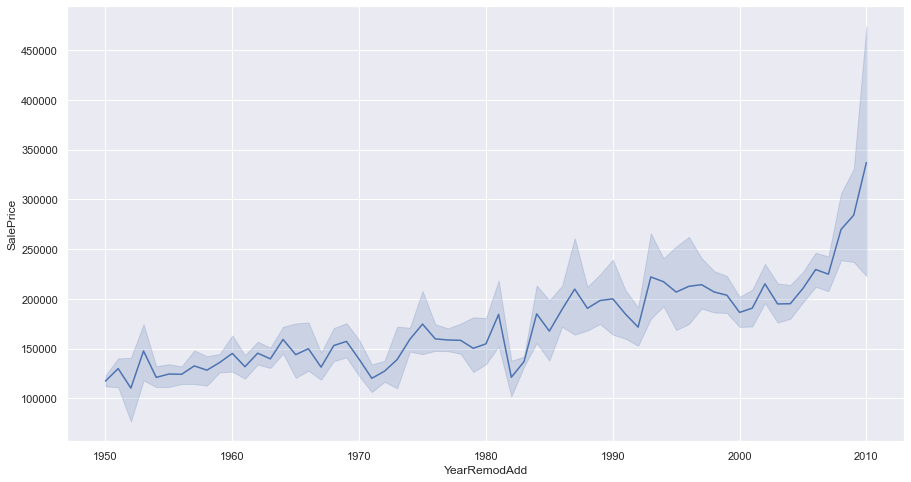

In [24]:
plt.figure(figsize = (15,8))
sb.lineplot(x= 'YearRemodAdd', y  = 'SalePrice', data =houseda)

#The later the house gets remodelled, the higher its sale price